In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
nasa_data = pd.read_csv('nasa.csv')
nasa_data

,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Arg,Mean Anomaly,Hazardous
0,0.127220,0.284472,6.115834,0.025282,0.425549,1.407011,6.025981,314.373913,57.257470,264.837533,True
1,0.146068,0.326618,18.113985,0.186935,0.351674,1.107776,28.412996,136.717242,313.091975,173.741112,False
2,0.231502,0.517654,7.590711,0.043058,0.348248,1.458824,4.237961,259.475979,248.415038,292.893654,True
3,0.008801,0.019681,11.173874,0.005512,0.216578,1.255903,7.905894,57.173266,18.707701,68.741007,False
4,0.127220,0.284472,9.840831,0.034798,0.210448,1.225615,16.793382,84.629307,158.263596,135.142133,True
...,...,...,...,...,...,...,...,...,...,...,...
4682,0.044112,0.098637,22.154265,0.019777,0.361512,1.161429,39.880491,164.183305,276.395697,304.306025,False
4683,0.006089,0.013616,3.225150,0.006451,0.073200,1.075134,5.360249,345.225230,42.111064,282.978786,False
4684,0.076658,0.171412,7.191642,0.059972,0.368055,1.528234,4.405467,37.026468,274.692712,203.501147,False
4685,0.116026,0.259442,11.352090,0.177510,0.202565,1.486600,21.080244,163.802910,180.346090,203.524965,False


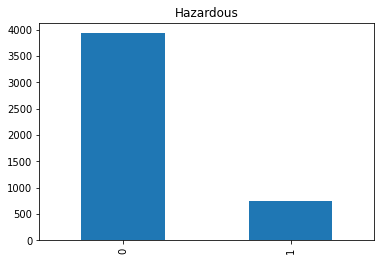

In [50]:
nasa_data["Hazardous"] = [int(obs) for obs in nasa_data["Hazardous"]]  #Change string data to integer ((True, Fale), (1,0))

nasa_data.Hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()


In [51]:
nasa_data.Hazardous.value_counts()


0    3932
1     755
Name: Hazardous, dtype: int64

In [52]:
x = nasa_data.iloc[:, 0:10]
y = nasa_data['Hazardous']


In [53]:
train_x, test_x, train_y, test_y =train_test_split( x,y, train_size=.70 )

In [54]:
# K=5
knn_nasa = KNeighborsClassifier(n_neighbors=5)

knn_nasa.fit(train_x,train_y)

KNeighborsClassifier()

In [62]:
# Calculate the accuracy of the model for n=5
accuracy = knn_nasa.score(test_x, test_y)
print(accuracy)

0.8336886993603412


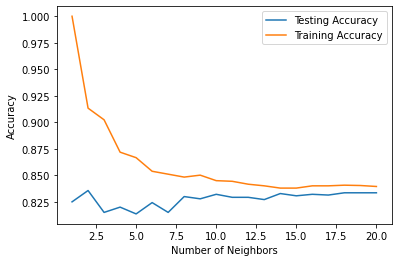

In [61]:
neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_nasa = KNeighborsClassifier(n_neighbors=k)
    knn_nasa.fit(train_x,train_y)

    # Compute accuracy on the training set
    train_accuracy[i] = knn_nasa.score(train_x, train_y)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_nasa.score(test_x, test_y)

# plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
